In [68]:
from importlib import reload
import methods
import warnings
import pickle

In [85]:
reload(methods)
from methods import *

In [58]:
#get the list of proteins names from the 'pdb' directory of protein structures

directory = 'pdb'
filenames = get_files_with_ext(directory, '.pdb')
protlist = [os.path.splitext(file)[0] for file in filenames]

In [78]:
#save plot of regression for each protein and save LRR annotation start/end into the dictionary cutoff_d. plot_regression returns standard deviation of middle line segment in regression.
cutoff_d = {}
std_d = {}
for protid in protlist:
    preX = get_backbone_from_pdb(f'pdb/{protid}.pdb')
    winding, m, parameters = get_regression(preX)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        stddev = plot_regression(winding, parameters, m, save = True, filename = f'plot/regression/{protid}')
        std_d[protid] = stddev
        cutoff_d[protid] = tuple(parameters.astype('int'))

with open('pickles/cutoff_d.pickle', 'wb') as handle:
    pickle.dump(cutoff_d, handle)
with open('pickles/std_d.pickle', 'wb') as handle:
    pickle.dump(std_d, handle)    

In [ ]:
'''alternative to previous cell: load dictionary from pickles'''

# with open('pickles/cutoff_d.pickle', 'rb') as handle:
#     cutoff_d = pickle.load(handle)    
# with open('pickles/std_d.pickle', 'rb') as handle:
#     std_d = pickle.load(handle)    

(array([17., 19., 33., 14., 15., 14., 13., 10., 11.,  4.,  6.,  2.,  3.,
         1.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
         2.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.0491697 , 0.09330121, 0.13743271, 0.18156422, 0.22569573,
        0.26982724, 0.31395875, 0.35809026, 0.40222176, 0.44635327,
        0.49048478, 0.53461629, 0.5787478 , 0.6228793 , 0.66701081,
        0.71114232, 0.75527383, 0.79940534, 0.84353685, 0.88766835,
        0.93179986, 0.97593137, 1.02006288, 1.06419439, 1.10832589,
        1.1524574 , 1.19658891, 1.24072042, 1.28485193, 1.32898343,
        1.37311494, 1.41724645, 1.46137796, 1.50550947, 1.54964098,
        1.59377248, 1.63790399, 1.6820355 , 1.72616701, 1.77029852,
        1.81443002, 1.85856153, 1.90269304, 1.94682455, 1.99095606,
        2.03508757, 2.07921907, 2.12335058, 2.16748209, 2.2116136 ,
        2.25574511]),
 <BarContainer

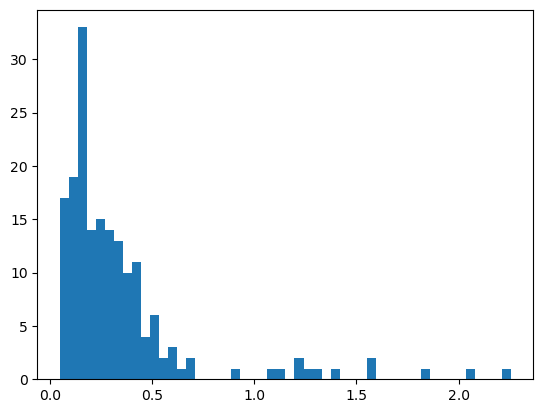

In [81]:
#visualize distribution of standard deviations to determine which regressions turned out badly and require multi-breakpoint
plt.hist(list(std_d.values()), bins = 50)

In [87]:
#run 4-breakpoint regression and save plots folder
multi_parameters = {}
for protid in protlist:
    if std_d[protid] > .7:
        preX = get_backbone_from_pdb(f'pdb/{protid}.pdb')
        a, b = cutoff_d[protid]
        winding, m, parameters = multi_regression(preX, a, b)
        plot_regression_multi(winding, parameters, m, filename = f'plot/piecewise_multi/{protid}', save = True)
# with open('pickles/multi_parameters.pickle', 'wb') as handle:
#     pickle.dump(multi_parameters, handle)       